# Survivor Data Analysis (Exploratory Data Analysis - EDA)

In this notebook, we’ll explore data from the TV show *Survivor* to understand what traits might influence success. We’ve pulled contestant and season information, and we’re starting by merging them into a single master dataset for analysis.

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
contestants = pd.read_csv("../data/contestant_table.csv")
seasons = pd.read_csv("../data/season_table.csv")

# Preview the first few rows of each
#print("Contestants:")
#display(contestants.head())

#print("Seasons:")
#display(seasons.head())

## Step 1: Load and Merge Data

We begin by loading our CSVs and merging them into one master dataset. This gives us a single table with contestant info, season details, and more — ready for analysis.

In [186]:
master = pd.merge(contestants, seasons, on="num_season", how="left")

In [187]:
display(master.head(5))

,contestant_name,age,hometown,profession,num_season,finish,gender,african_american_x,asian_american_x,latin_american_x,...,african_american_y,asian_american_y,latin_american_y,poc_y,lgbt_y,jewish_y,muslim_y,num_quits,num_evacs,winner
0,Sonja Christopher,63,"Walnut Creek, CA",Musician/Retired Teacher,1,16,F,0,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
1,B.B. Andersen,64,"Mission Hills, KS",Real Estate Developer,1,15,M,0,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
2,Stacey Stillman,27,"San Francisco, CA",Attorney,1,14,F,0,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
3,Ramona Gray,29,"Edison, NJ",Biochemist,1,13,F,1,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch
4,Dirk Been,23,"Spring Green, WI",Dairy Farmer,1,12,M,0,0,0,...,2,0,0,2,2,0,0,0,0,Richard Hatch


## Step 2: What Makes a Survivor Winner?

Let’s filter the dataset to look only at winners and start analyzing what makes them stand out — by age, gender, profession, and location.


**Average Age of Winners**

Average Age of Winners: 31.63


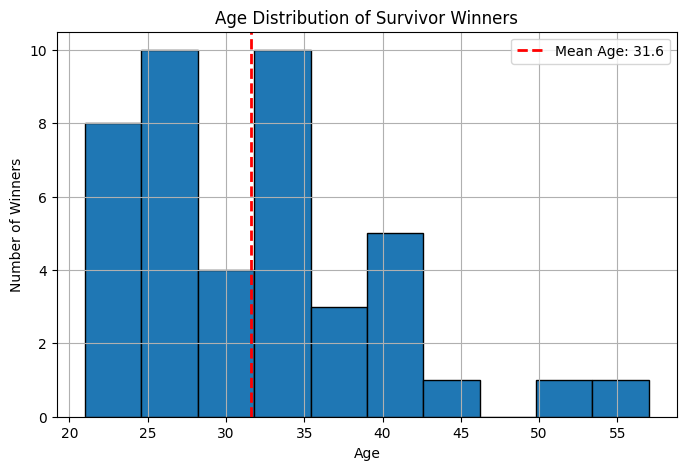

In [188]:
# winning contestants from each season
winners = master[master['contestant_name'] == master['winner']]

# Define the average
avg_age = winners['age'].mean()
print(f"Average Age of Winners: {avg_age:.2f}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(winners['age'], bins=10, edgecolor='black')
plt.axvline(avg_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {avg_age:.1f}')
plt.title('Age Distribution of Survivor Winners')
plt.xlabel('Age')
plt.ylabel('Number of Winners')
plt.legend()
plt.grid(True)
plt.show()

**Male vs Female Winners**

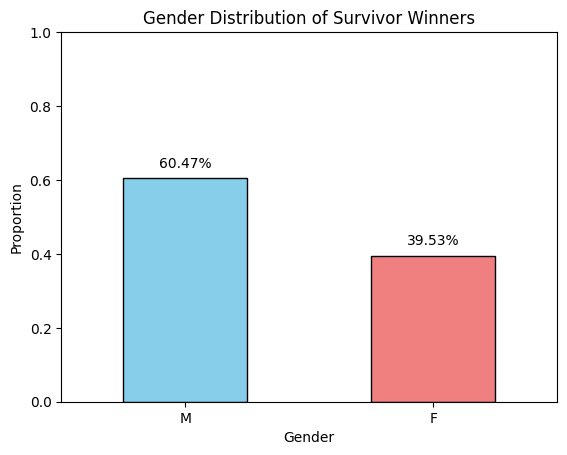

In [189]:
# Get proportions
gender_counts = winners['gender'].value_counts(normalize=True)

# Plot
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

# Formatting
plt.title('Gender Distribution of Survivor Winners')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Show the percentage values on top of bars (optional polish)
for i, value in enumerate(gender_counts):
    plt.text(i, value + 0.02, f"{value:.2%}", ha='center', va='bottom')

plt.show()

**Top Winners Profession**

In [190]:
winners['profession'].value_counts().head(10)

profession
Police Officer                 3
Firefighter                    2
Office Assistant               2
Professional Soccer Player     1
Office Manager                 1
Personal Nurse                 1
Corporate Trainer              1
Swimsuit Model                 1
Used Car Salesman              1
Highway Construction Worker    1
Name: count, dtype: int64

**Winners From States**

In [191]:
winners['state'].value_counts().head(10)

state
California      8
New York        4
New Jersey      4
Pennsylvania    3
Texas           2
Utah            2
Iowa            2
Idaho           2
Ontario         2
Rhode Island    1
Name: count, dtype: int64